## Convert Glossis Grid to EE and analyse timeseries
* Make shapefile from netcdf face coordinates
* Analyse tidal signal at location of Terschelling Noordzee, Delfzijl and Haringvliet

In [1]:
import numpy as np
import shapefile
import shapely.geometry
import netCDF4 as nc
import numpy.ma
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
import scipy.stats
import peakutils
import os
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


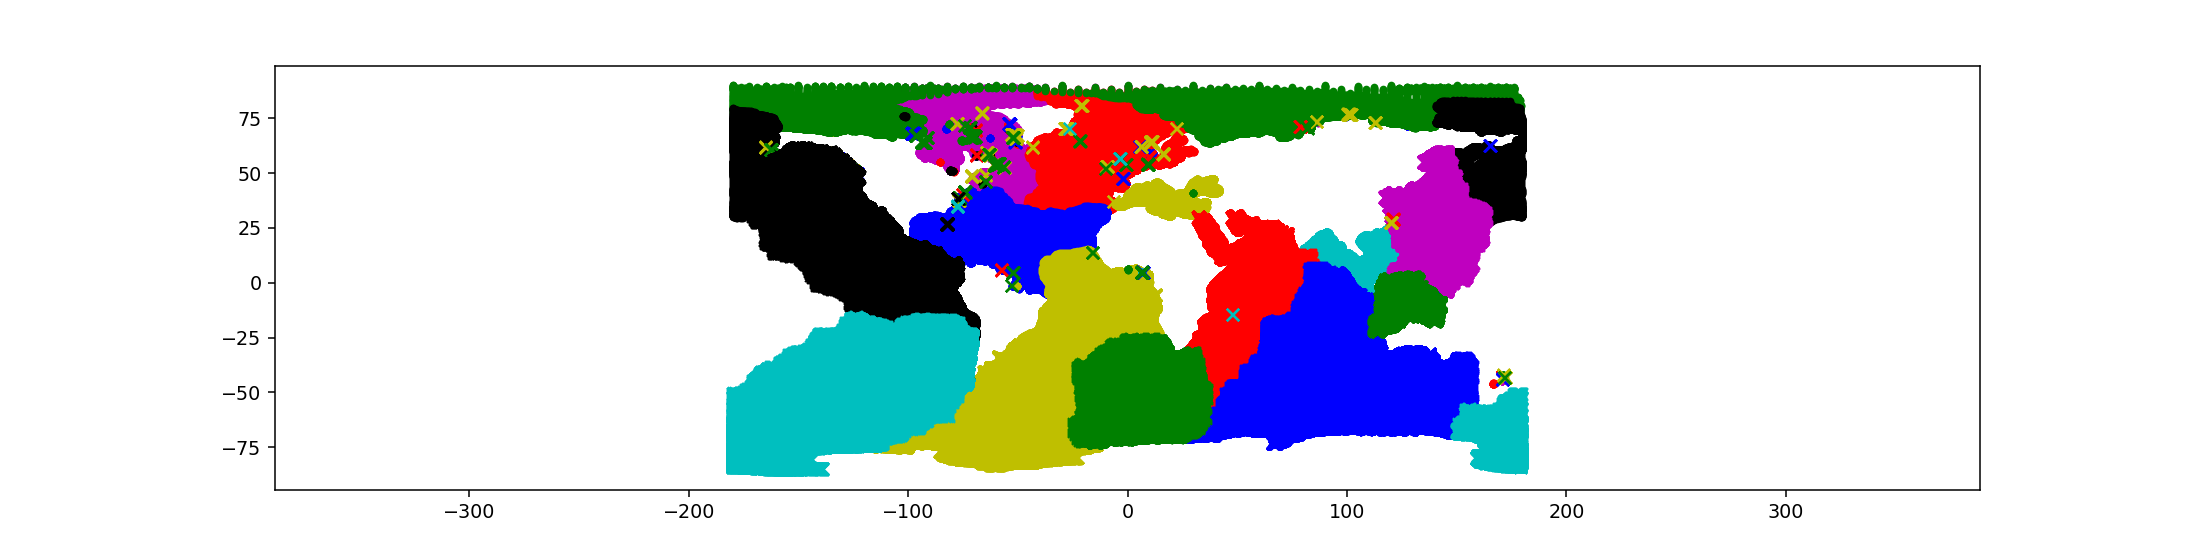

gtsm_fine_0000_map.nc
gtsm_fine_0001_map.nc
gtsm_fine_0002_map.nc
gtsm_fine_0003_map.nc
gtsm_fine_0004_map.nc
gtsm_fine_0005_map.nc
gtsm_fine_0006_map.nc
gtsm_fine_0007_map.nc
gtsm_fine_0008_map.nc
gtsm_fine_0009_map.nc
gtsm_fine_0010_map.nc
gtsm_fine_0011_map.nc
gtsm_fine_0012_map.nc
gtsm_fine_0013_map.nc
gtsm_fine_0014_map.nc


In [2]:
# Load nc file
markers = ['m.','r.','b.','y.','g.', 'k.','c.', 'mx','rx','bx','yx','gx','kx','cx']
plt.figure(figsize=(16,4))
for i in range(16):
    directory = r"G:\vanCindy\GLOSSIS_fc"
    if i <= 9:
        filename = r"gtsm_fine_000" + str(i) + "_map.nc"
    else:
        filename = r"gtsm_fine_00" + str(i) + "_map.nc"

    print filename
    data = nc.Dataset('%s/%s' %(directory,filename))
    lat = (data.variables['mesh2d_node_x'][:])
    lon = (data.variables['mesh2d_node_y'][:])
    fnodes = np.transpose(data.variables['mesh2d_face_nodes'][:, :] - 1)
    water = (data.variables['mesh2d_s1'][:, :])
    time_var = data.variables['time'] # contains 235 timesteps of data
    dtime = nc.num2date(time_var[:],time_var.units)
    
    if i > len(markers)-1:
        break

    plt.plot(lat,lon,markers[i])
    plt.axis('equal')
    
# europe = 1, 3, 4 ('r.', 'y.', 'g.')

In [3]:
# define poly to clip grid
EUropepoly = shapely.geometry.Polygon([[-39.7265625,70.67088107015755], [-37.6171875,24.686952411999155], 
                                       [49.04296875,28.304380682962783], [45.703125,72.86793049861396], 
                                       [-39.7265625,70.67088107015755]])

<IPython.core.display.Javascript object>


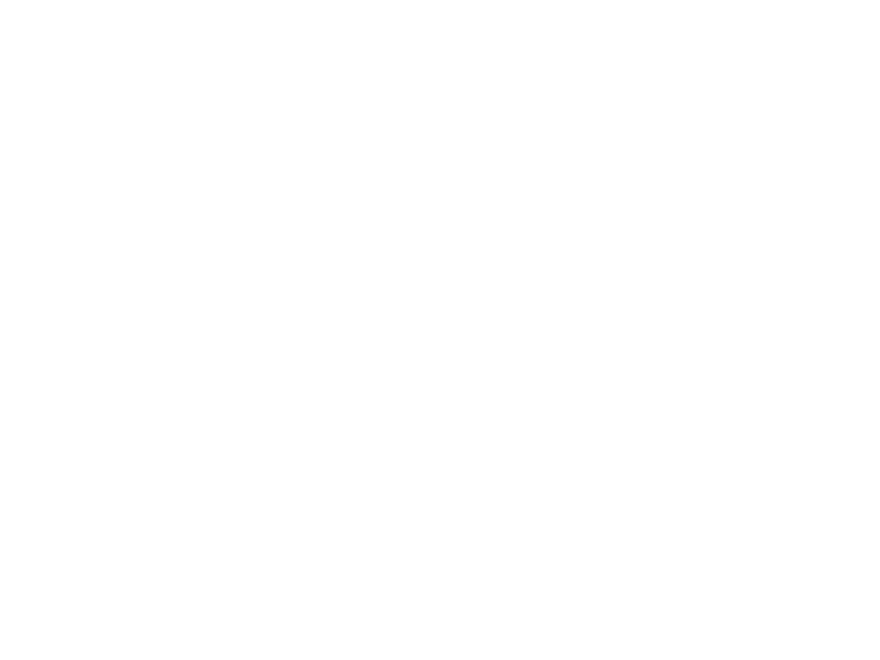

gtsm_fine_0000_map.nc
0 121081
1000 121081
2000 121081
3000 121081
4000 121081
5000 121081
6000 121081
7000 121081
8000 121081
9000 121081
10000 121081
11000 121081
12000 121081
13000 121081
14000 121081
15000 121081
16000 121081
17000 121081
18000 121081
19000 121081
20000 121081
21000 121081
22000 121081
23000 121081
24000 121081
25000 121081
26000 121081
27000 121081
28000 121081
29000 121081
30000 121081
31000 121081
32000 121081
33000 121081
34000 121081
35000 121081
36000 121081
37000 121081
38000 121081
39000 121081
40000 121081
41000 121081
42000 121081
43000 121081
44000 121081
45000 121081
46000 121081
47000 121081
48000 121081
49000 121081
50000 121081
51000 121081
52000 121081
53000 121081
54000 121081
55000 121081
56000 121081
57000 121081
58000 121081
59000 121081
60000 121081
61000 121081
62000 121081
63000 121081
64000 121081
65000 121081
66000 121081
67000 121081
68000 121081
69000 121081
70000 121081
71000 121081
72000 121081
73000 121081
74000 121081
75000 121081
760

<IPython.core.display.Javascript object>


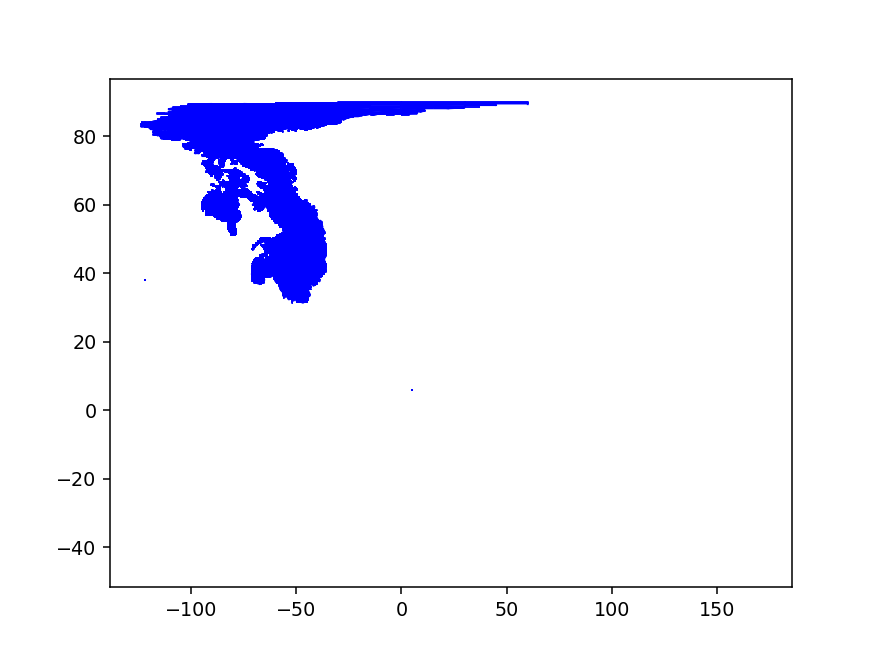

gtsm_fine_0001_map.nc
0 121308
1000 121308
2000 121308
3000 121308
4000 121308
5000 121308
6000 121308
7000 121308
8000 121308
9000 121308
10000 121308
11000 121308
12000 121308
13000 121308
14000 121308
15000 121308
16000 121308
17000 121308
18000 121308
19000 121308
20000 121308
21000 121308
22000 121308
23000 121308
24000 121308
25000 121308
26000 121308
27000 121308
28000 121308
29000 121308
30000 121308
31000 121308
32000 121308
33000 121308
34000 121308
35000 121308
36000 121308
37000 121308
38000 121308
39000 121308
40000 121308
41000 121308
42000 121308
43000 121308
44000 121308
45000 121308
46000 121308
47000 121308
48000 121308
49000 121308
50000 121308
51000 121308
52000 121308
53000 121308
54000 121308
55000 121308
56000 121308
57000 121308
58000 121308
59000 121308
60000 121308
61000 121308
62000 121308
63000 121308
64000 121308
65000 121308
66000 121308
67000 121308
68000 121308
69000 121308
70000 121308
71000 121308
72000 121308
73000 121308
74000 121308
75000 121308
760

<IPython.core.display.Javascript object>


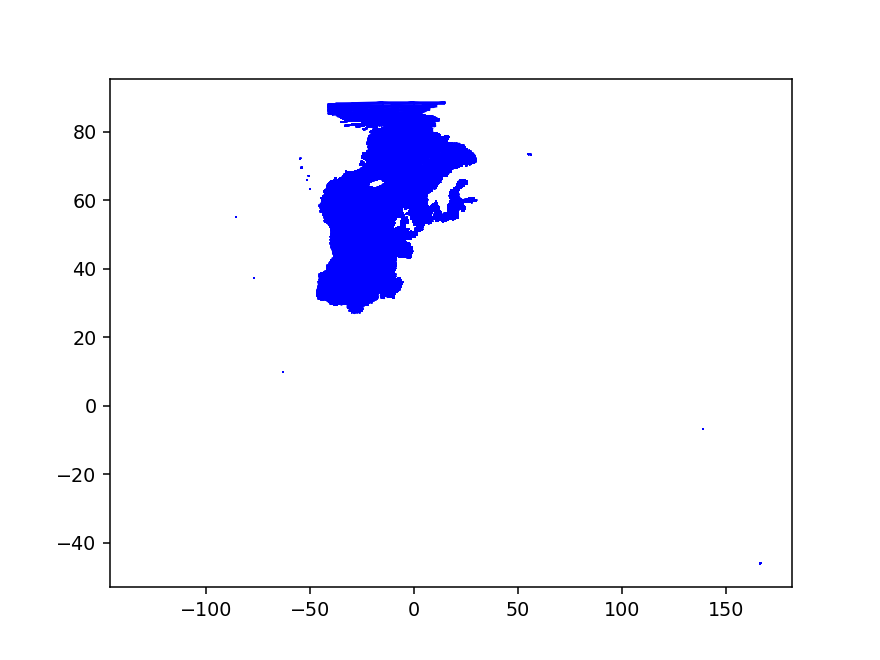

gtsm_fine_0002_map.nc
0 121240
1000 121240
2000 121240
3000 121240
4000 121240
5000 121240
6000 121240
7000 121240
8000 121240
9000 121240
10000 121240
11000 121240
12000 121240
13000 121240
14000 121240
15000 121240
16000 121240
17000 121240
18000 121240
19000 121240
20000 121240
21000 121240
22000 121240
23000 121240
24000 121240
25000 121240
26000 121240
27000 121240
28000 121240
29000 121240
30000 121240
31000 121240
32000 121240
33000 121240
34000 121240
35000 121240
36000 121240
37000 121240
38000 121240
39000 121240
40000 121240
41000 121240
42000 121240
43000 121240
44000 121240
45000 121240
46000 121240
47000 121240
48000 121240
49000 121240
50000 121240
51000 121240
52000 121240
53000 121240
54000 121240
55000 121240
56000 121240
57000 121240
58000 121240
59000 121240
60000 121240
61000 121240
62000 121240
63000 121240
64000 121240
65000 121240
66000 121240
67000 121240
68000 121240
69000 121240
70000 121240
71000 121240
72000 121240
73000 121240
74000 121240
75000 121240
760

<IPython.core.display.Javascript object>


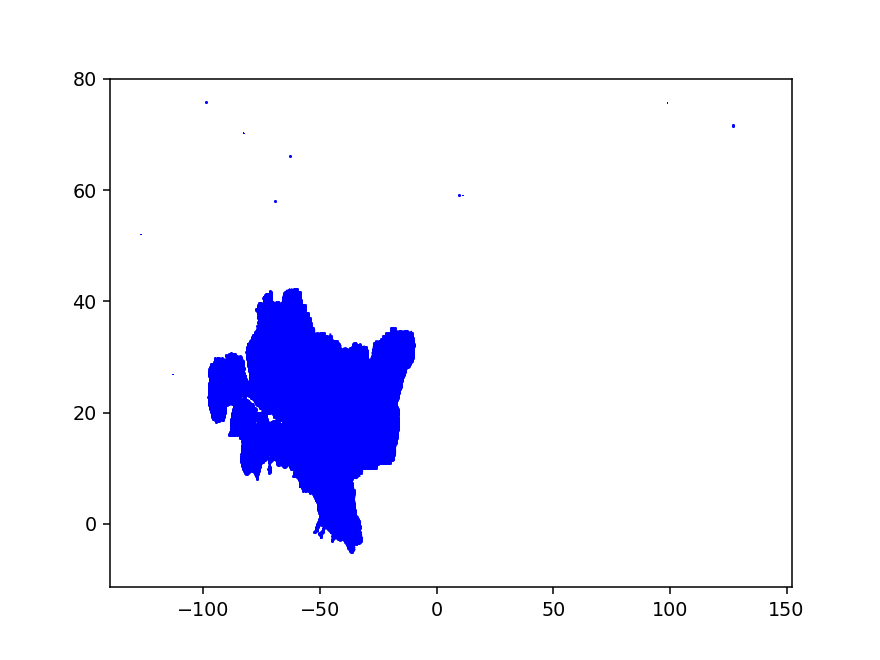

gtsm_fine_0003_map.nc
0 121128
1000 121128
2000 121128
3000 121128
4000 121128
5000 121128
6000 121128
7000 121128
8000 121128
9000 121128
10000 121128
11000 121128
12000 121128
13000 121128
14000 121128
15000 121128
16000 121128
17000 121128
18000 121128
19000 121128
20000 121128
21000 121128
22000 121128
23000 121128
24000 121128
25000 121128
26000 121128
27000 121128
28000 121128
29000 121128
30000 121128
31000 121128
32000 121128
33000 121128
34000 121128
35000 121128
36000 121128
37000 121128
38000 121128
39000 121128
40000 121128
41000 121128
42000 121128
43000 121128
44000 121128
45000 121128
46000 121128
47000 121128
48000 121128
49000 121128
50000 121128
51000 121128
52000 121128
53000 121128
54000 121128
55000 121128
56000 121128
57000 121128
58000 121128
59000 121128
60000 121128
61000 121128
62000 121128
63000 121128
64000 121128
65000 121128
66000 121128
67000 121128
68000 121128
69000 121128
70000 121128
71000 121128
72000 121128
73000 121128
74000 121128
75000 121128
760

<IPython.core.display.Javascript object>


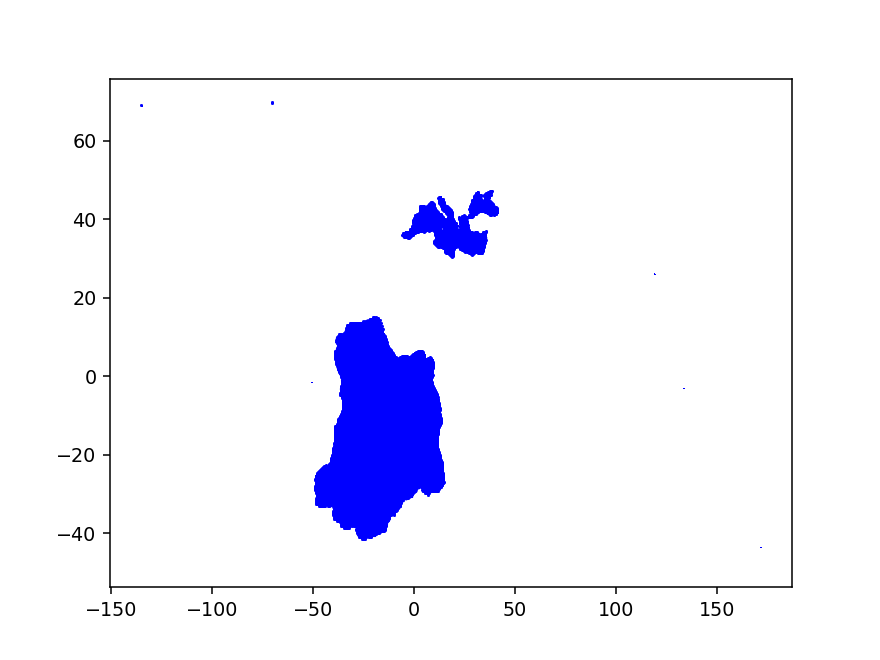

gtsm_fine_0004_map.nc
0 121571
1000 121571
2000 121571
3000 121571
4000 121571
5000 121571
6000 121571
7000 121571
8000 121571
9000 121571
10000 121571
11000 121571
12000 121571
13000 121571
14000 121571
15000 121571
16000 121571
17000 121571
18000 121571
19000 121571
20000 121571
21000 121571
22000 121571
23000 121571
24000 121571
25000 121571
26000 121571
27000 121571
28000 121571
29000 121571
30000 121571
31000 121571
32000 121571
33000 121571
34000 121571
35000 121571
36000 121571
37000 121571
38000 121571
39000 121571
40000 121571
41000 121571
42000 121571
43000 121571
44000 121571
45000 121571
46000 121571
47000 121571
48000 121571
49000 121571
50000 121571
51000 121571
52000 121571
53000 121571
54000 121571
55000 121571
56000 121571
57000 121571
58000 121571
59000 121571
60000 121571
61000 121571
62000 121571
63000 121571
64000 121571
65000 121571
66000 121571
67000 121571
68000 121571
69000 121571
70000 121571
71000 121571
72000 121571
73000 121571
74000 121571
75000 121571
760

<IPython.core.display.Javascript object>


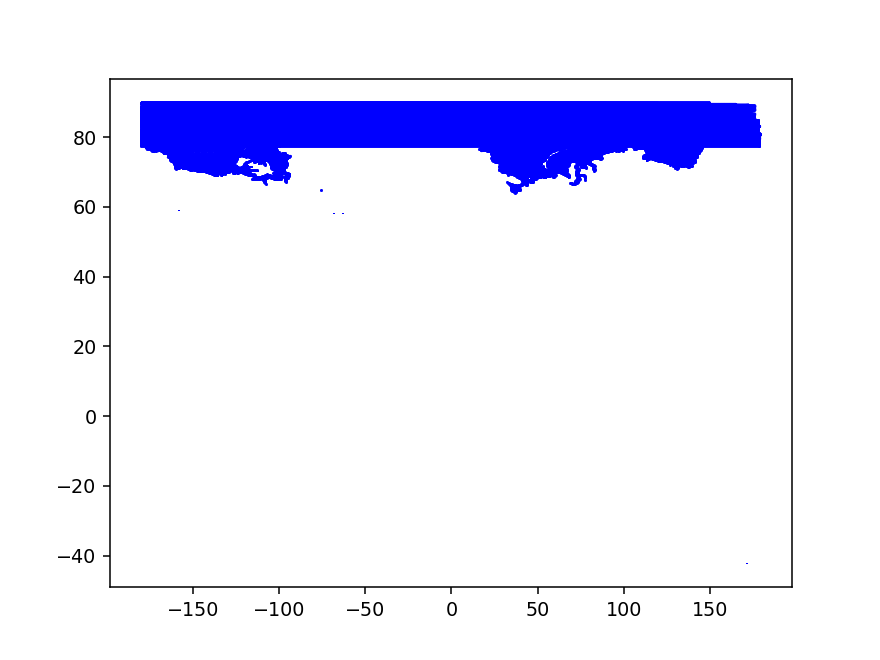

gtsm_fine_0005_map.nc
0 122151
1000 122151
2000 122151
3000 122151
4000 122151
5000 122151
6000 122151
7000 122151
8000 122151
9000 122151
10000 122151
11000 122151
12000 122151
13000 122151
14000 122151
15000 122151
16000 122151
17000 122151
18000 122151
19000 122151
20000 122151
21000 122151
22000 122151
23000 122151
24000 122151
25000 122151
26000 122151
27000 122151
28000 122151
29000 122151
30000 122151
31000 122151
32000 122151
33000 122151
34000 122151
35000 122151
36000 122151
37000 122151
38000 122151
39000 122151
40000 122151
41000 122151
42000 122151
43000 122151
44000 122151
45000 122151
46000 122151
47000 122151
48000 122151
49000 122151
50000 122151
51000 122151
52000 122151
53000 122151
54000 122151
55000 122151
56000 122151
57000 122151
58000 122151
59000 122151
60000 122151
61000 122151
62000 122151
63000 122151
64000 122151
65000 122151
66000 122151
67000 122151
68000 122151
69000 122151
70000 122151
71000 122151
72000 122151
73000 122151
74000 122151
75000 122151
760

<IPython.core.display.Javascript object>


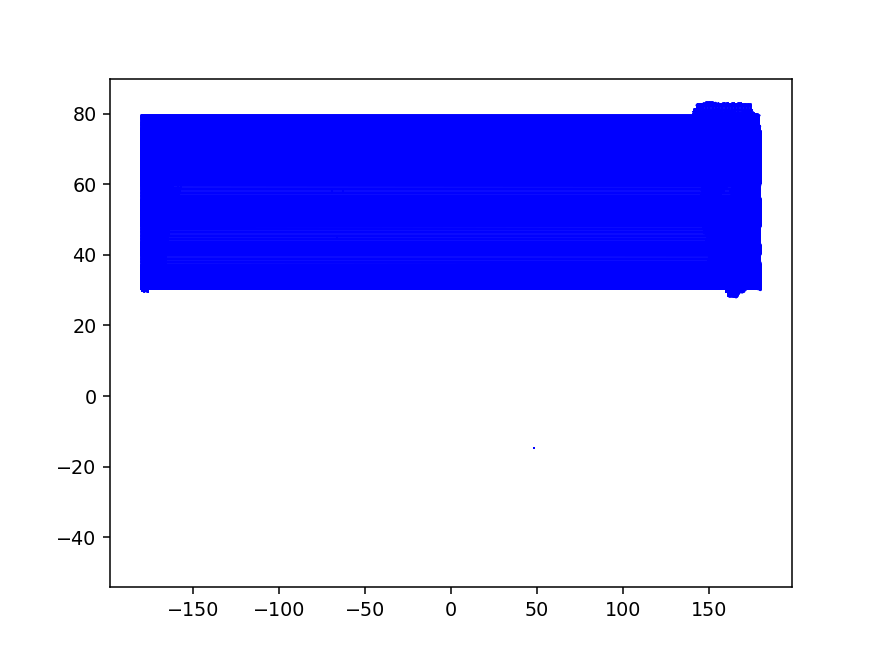

gtsm_fine_0006_map.nc
0 121003
1000 121003
2000 121003
3000 121003
4000 121003
5000 121003
6000 121003
7000 121003
8000 121003
9000 121003
10000 121003
11000 121003
12000 121003
13000 121003
14000 121003
15000 121003
16000 121003
17000 121003
18000 121003
19000 121003
20000 121003
21000 121003
22000 121003
23000 121003
24000 121003
25000 121003
26000 121003
27000 121003
28000 121003
29000 121003
30000 121003
31000 121003
32000 121003
33000 121003
34000 121003
35000 121003
36000 121003
37000 121003
38000 121003
39000 121003
40000 121003
41000 121003
42000 121003
43000 121003
44000 121003
45000 121003
46000 121003
47000 121003
48000 121003
49000 121003
50000 121003
51000 121003
52000 121003
53000 121003
54000 121003
55000 121003
56000 121003
57000 121003
58000 121003
59000 121003
60000 121003
61000 121003
62000 121003
63000 121003
64000 121003
65000 121003
66000 121003
67000 121003
68000 121003
69000 121003
70000 121003
71000 121003
72000 121003
73000 121003
74000 121003
75000 121003
760

<IPython.core.display.Javascript object>


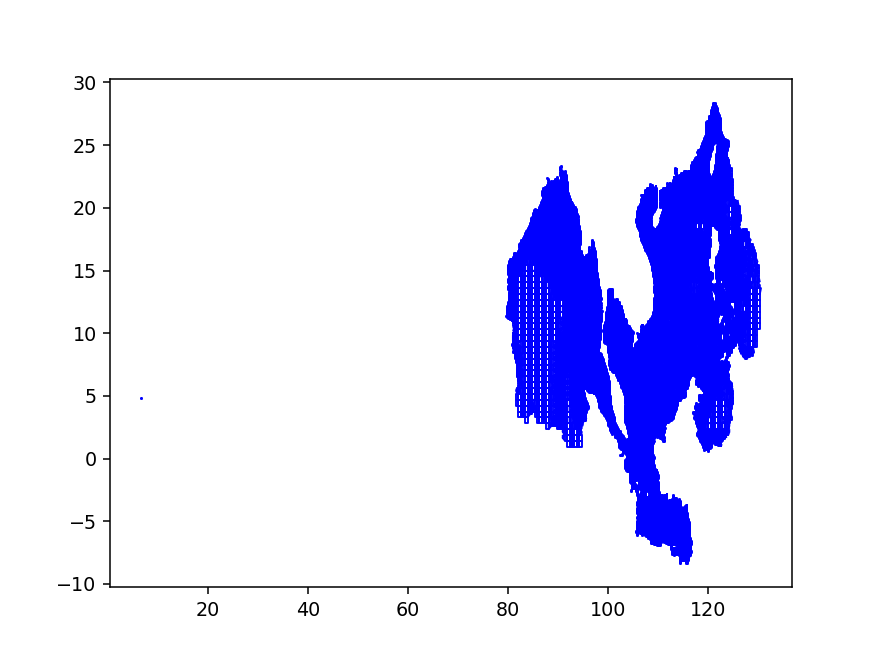

gtsm_fine_0007_map.nc
0 122179
1000 122179
2000 122179
3000 122179
4000 122179
5000 122179
6000 122179
7000 122179
8000 122179
9000 122179
10000 122179
11000 122179
12000 122179
13000 122179
14000 122179
15000 122179
16000 122179
17000 122179
18000 122179
19000 122179
20000 122179
21000 122179
22000 122179
23000 122179
24000 122179
25000 122179
26000 122179
27000 122179
28000 122179
29000 122179
30000 122179
31000 122179
32000 122179
33000 122179
34000 122179
35000 122179
36000 122179
37000 122179
38000 122179
39000 122179
40000 122179
41000 122179
42000 122179
43000 122179
44000 122179
45000 122179
46000 122179
47000 122179
48000 122179
49000 122179
50000 122179
51000 122179
52000 122179
53000 122179
54000 122179
55000 122179
56000 122179
57000 122179
58000 122179
59000 122179
60000 122179
61000 122179
62000 122179
63000 122179
64000 122179
65000 122179
66000 122179
67000 122179
68000 122179
69000 122179
70000 122179
71000 122179
72000 122179
73000 122179
74000 122179
75000 122179
760

<IPython.core.display.Javascript object>


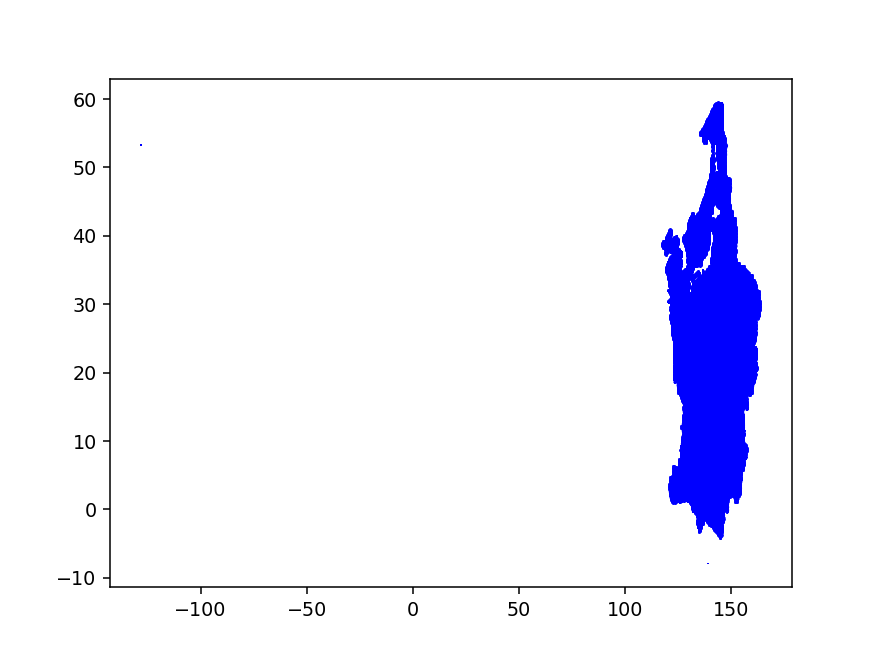

gtsm_fine_0008_map.nc
0 121185
1000 121185
2000 121185
3000 121185
4000 121185
5000 121185
6000 121185
7000 121185
8000 121185
9000 121185
10000 121185
11000 121185
12000 121185
13000 121185
14000 121185
15000 121185
16000 121185
17000 121185
18000 121185
19000 121185
20000 121185
21000 121185
22000 121185
23000 121185
24000 121185
25000 121185
26000 121185
27000 121185
28000 121185
29000 121185
30000 121185
31000 121185
32000 121185
33000 121185
34000 121185
35000 121185
36000 121185
37000 121185
38000 121185
39000 121185
40000 121185
41000 121185
42000 121185
43000 121185
44000 121185
45000 121185
46000 121185
47000 121185
48000 121185
49000 121185
50000 121185
51000 121185
52000 121185
53000 121185
54000 121185
55000 121185
56000 121185
57000 121185
58000 121185
59000 121185
60000 121185
61000 121185
62000 121185
63000 121185
64000 121185
65000 121185
66000 121185
67000 121185
68000 121185
69000 121185
70000 121185
71000 121185
72000 121185
73000 121185
74000 121185
75000 121185
760

<IPython.core.display.Javascript object>


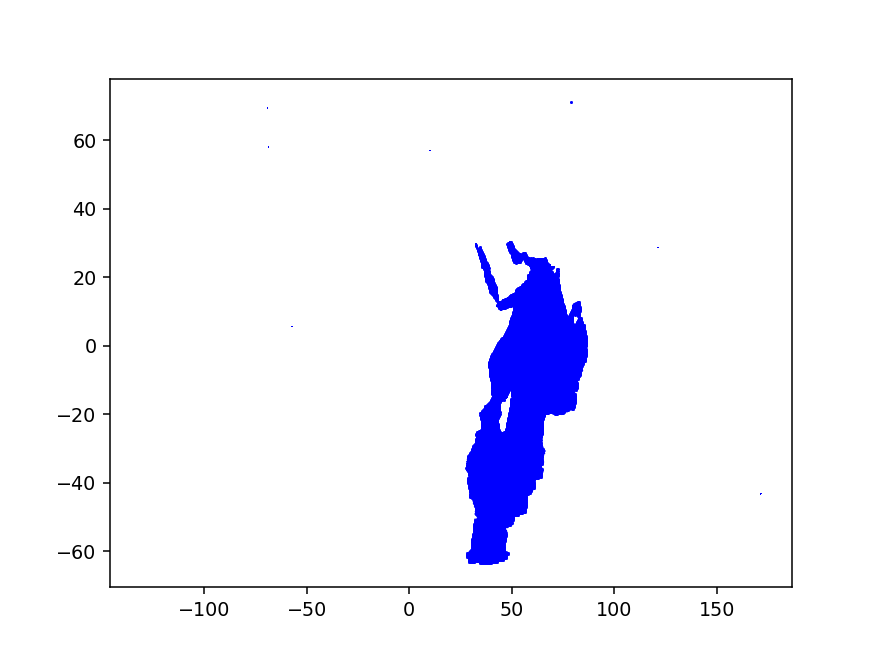

gtsm_fine_0009_map.nc
0 122170
1000 122170
2000 122170
3000 122170
4000 122170
5000 122170
6000 122170
7000 122170
8000 122170
9000 122170
10000 122170
11000 122170
12000 122170
13000 122170
14000 122170
15000 122170
16000 122170
17000 122170
18000 122170
19000 122170
20000 122170
21000 122170
22000 122170
23000 122170
24000 122170
25000 122170
26000 122170
27000 122170
28000 122170
29000 122170
30000 122170
31000 122170
32000 122170
33000 122170
34000 122170
35000 122170
36000 122170
37000 122170
38000 122170
39000 122170
40000 122170
41000 122170
42000 122170
43000 122170
44000 122170
45000 122170
46000 122170
47000 122170
48000 122170
49000 122170
50000 122170
51000 122170
52000 122170
53000 122170
54000 122170
55000 122170
56000 122170
57000 122170
58000 122170
59000 122170
60000 122170
61000 122170
62000 122170
63000 122170
64000 122170
65000 122170
66000 122170
67000 122170
68000 122170
69000 122170
70000 122170
71000 122170
72000 122170
73000 122170
74000 122170
75000 122170
760

<IPython.core.display.Javascript object>


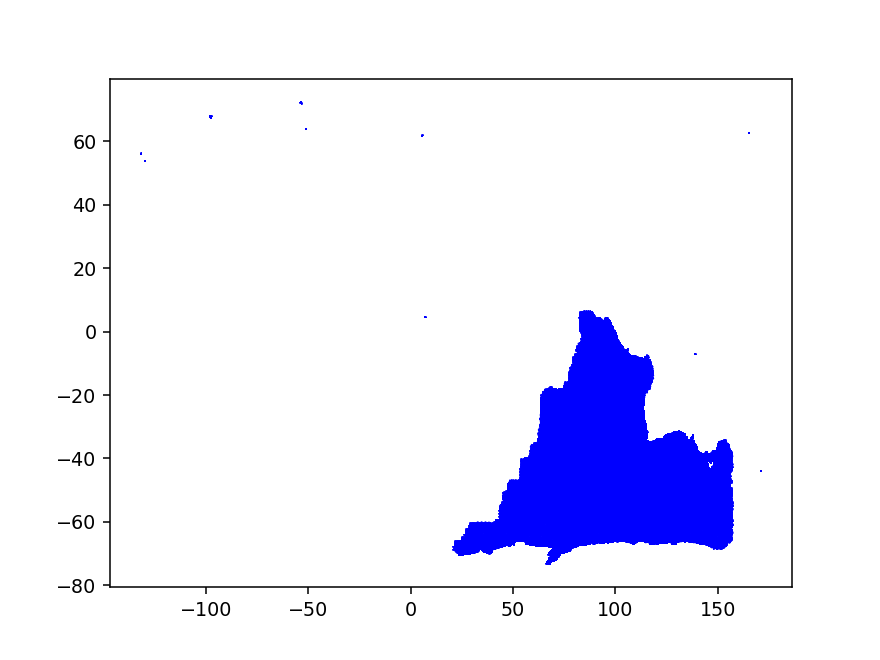

gtsm_fine_0010_map.nc
0 120990
1000 120990
2000 120990
3000 120990
4000 120990
5000 120990
6000 120990
7000 120990
8000 120990
9000 120990
10000 120990
11000 120990
12000 120990
13000 120990
14000 120990
15000 120990
16000 120990
17000 120990
18000 120990
19000 120990
20000 120990
21000 120990
22000 120990
23000 120990
24000 120990
25000 120990
26000 120990
27000 120990
28000 120990
29000 120990
30000 120990
31000 120990
32000 120990
33000 120990
34000 120990
35000 120990
36000 120990
37000 120990
38000 120990
39000 120990
40000 120990
41000 120990
42000 120990
43000 120990
44000 120990
45000 120990
46000 120990
47000 120990
48000 120990
49000 120990
50000 120990
51000 120990
52000 120990
53000 120990
54000 120990
55000 120990
56000 120990
57000 120990
58000 120990
59000 120990
60000 120990
61000 120990
62000 120990
63000 120990
64000 120990
65000 120990
66000 120990
67000 120990
68000 120990
69000 120990
70000 120990
71000 120990
72000 120990
73000 120990
74000 120990
75000 120990
760

<IPython.core.display.Javascript object>


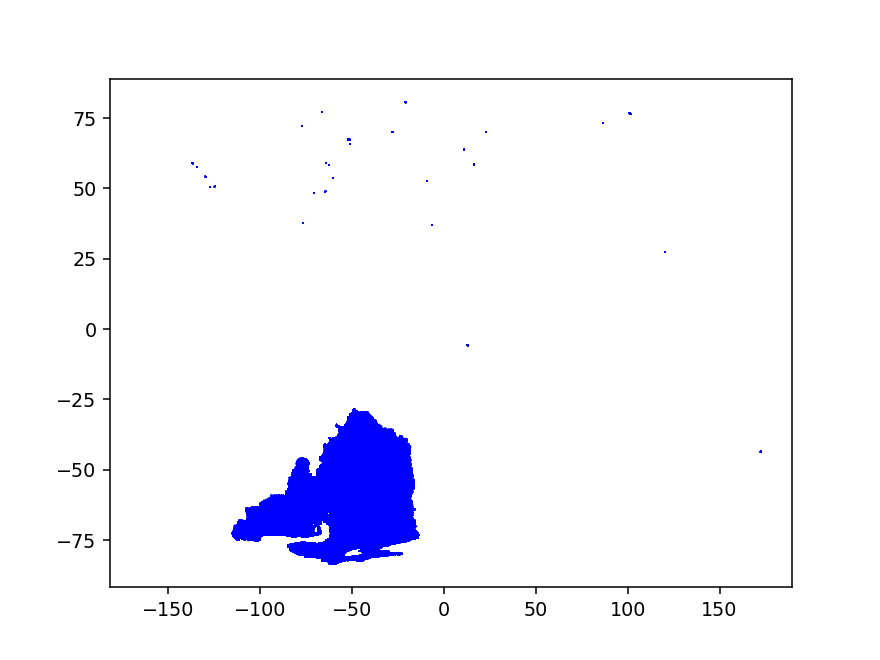

gtsm_fine_0011_map.nc
0 122419
1000 122419
2000 122419
3000 122419
4000 122419
5000 122419
6000 122419
7000 122419
8000 122419
9000 122419
10000 122419
11000 122419
12000 122419
13000 122419
14000 122419
15000 122419
16000 122419
17000 122419
18000 122419
19000 122419
20000 122419
21000 122419
22000 122419
23000 122419
24000 122419
25000 122419
26000 122419
27000 122419
28000 122419
29000 122419
30000 122419
31000 122419
32000 122419
33000 122419
34000 122419
35000 122419
36000 122419
37000 122419
38000 122419
39000 122419
40000 122419
41000 122419
42000 122419
43000 122419
44000 122419
45000 122419
46000 122419
47000 122419
48000 122419
49000 122419
50000 122419
51000 122419
52000 122419
53000 122419
54000 122419
55000 122419
56000 122419
57000 122419
58000 122419
59000 122419
60000 122419
61000 122419
62000 122419
63000 122419
64000 122419
65000 122419
66000 122419
67000 122419
68000 122419
69000 122419
70000 122419
71000 122419
72000 122419
73000 122419
74000 122419
75000 122419
760

<IPython.core.display.Javascript object>


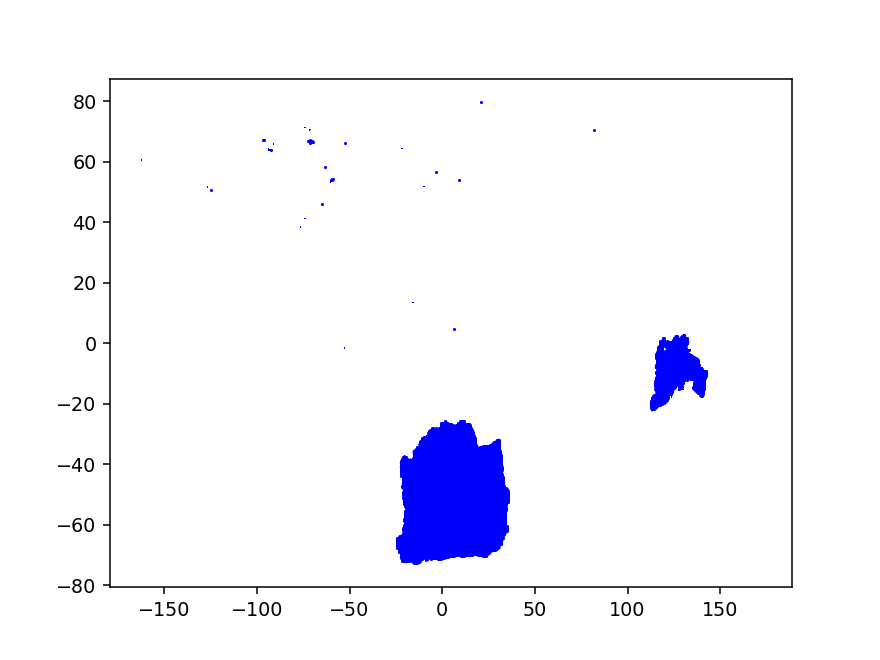

gtsm_fine_0012_map.nc
0 121659
1000 121659
2000 121659
3000 121659
4000 121659
5000 121659
6000 121659
7000 121659
8000 121659
9000 121659
10000 121659
11000 121659
12000 121659
13000 121659
14000 121659
15000 121659
16000 121659
17000 121659
18000 121659
19000 121659
20000 121659
21000 121659
22000 121659
23000 121659
24000 121659
25000 121659
26000 121659
27000 121659
28000 121659
29000 121659
30000 121659
31000 121659
32000 121659
33000 121659
34000 121659
35000 121659
36000 121659
37000 121659
38000 121659
39000 121659
40000 121659
41000 121659
42000 121659
43000 121659
44000 121659
45000 121659
46000 121659
47000 121659
48000 121659
49000 121659
50000 121659
51000 121659
52000 121659
53000 121659
54000 121659
55000 121659
56000 121659
57000 121659
58000 121659
59000 121659
60000 121659
61000 121659
62000 121659
63000 121659
64000 121659
65000 121659
66000 121659
67000 121659
68000 121659
69000 121659
70000 121659
71000 121659
72000 121659
73000 121659
74000 121659
75000 121659
760

<IPython.core.display.Javascript object>


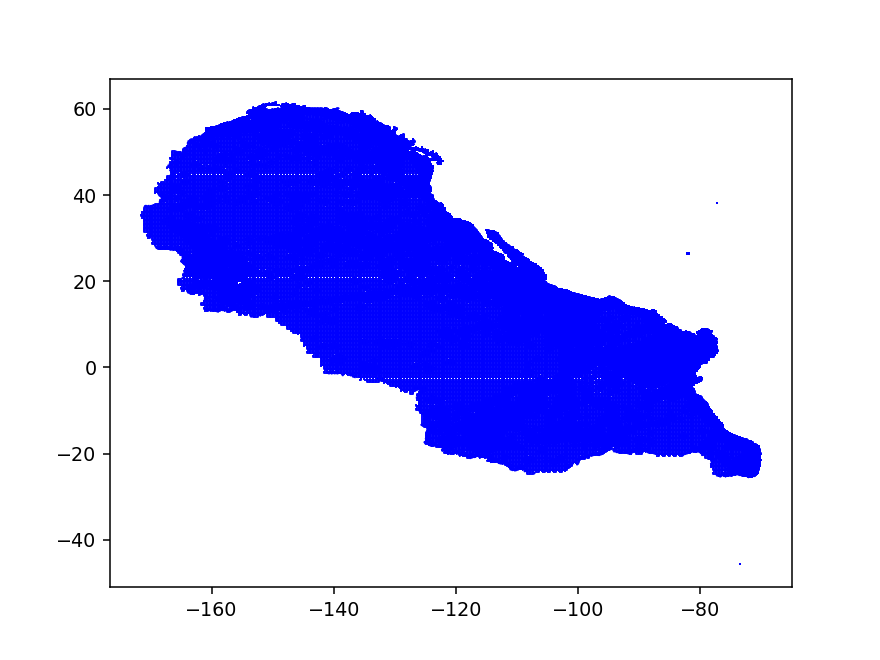

gtsm_fine_0013_map.nc
0 122588
1000 122588
2000 122588
3000 122588
4000 122588
5000 122588
6000 122588
7000 122588
8000 122588
9000 122588
10000 122588
11000 122588
12000 122588
13000 122588
14000 122588
15000 122588
16000 122588
17000 122588
18000 122588
19000 122588
20000 122588
21000 122588
22000 122588
23000 122588
24000 122588
25000 122588
26000 122588
27000 122588
28000 122588
29000 122588
30000 122588
31000 122588
32000 122588
33000 122588
34000 122588
35000 122588
36000 122588
37000 122588
38000 122588
39000 122588
40000 122588
41000 122588
42000 122588
43000 122588
44000 122588
45000 122588
46000 122588
47000 122588
48000 122588
49000 122588
50000 122588
51000 122588
52000 122588
53000 122588
54000 122588
55000 122588
56000 122588
57000 122588
58000 122588
59000 122588
60000 122588
61000 122588
62000 122588
63000 122588
64000 122588
65000 122588
66000 122588
67000 122588
68000 122588
69000 122588
70000 122588
71000 122588
72000 122588
73000 122588
74000 122588
75000 122588
760

<IPython.core.display.Javascript object>


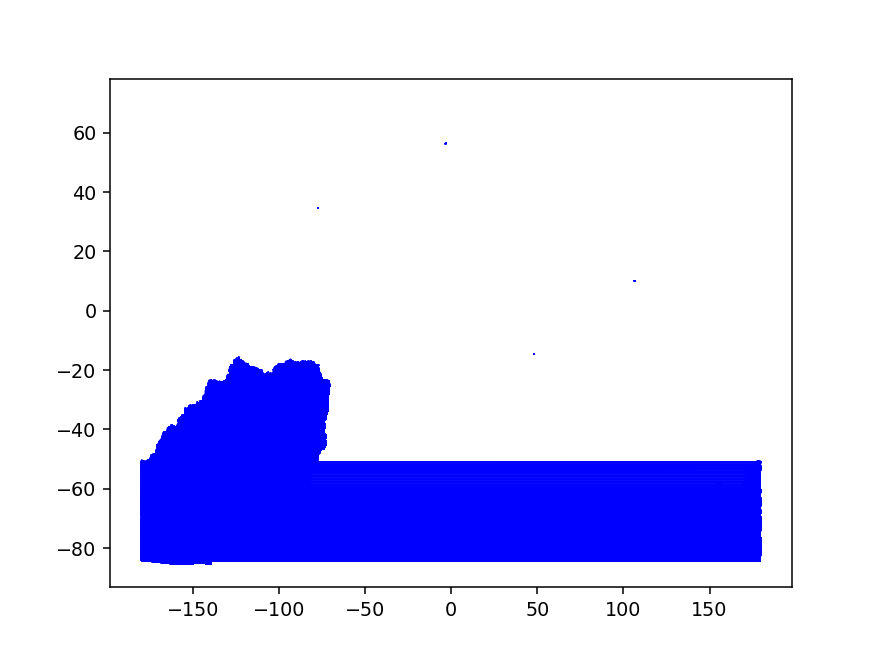

gtsm_fine_0014_map.nc
0 123934
1000 123934
2000 123934
3000 123934
4000 123934
5000 123934
6000 123934
7000 123934
8000 123934
9000 123934
10000 123934
11000 123934
12000 123934
13000 123934
14000 123934
15000 123934
16000 123934
17000 123934
18000 123934
19000 123934
20000 123934
21000 123934
22000 123934
23000 123934
24000 123934
25000 123934
26000 123934
27000 123934
28000 123934
29000 123934
30000 123934
31000 123934
32000 123934
33000 123934
34000 123934
35000 123934
36000 123934
37000 123934
38000 123934
39000 123934
40000 123934
41000 123934
42000 123934
43000 123934
44000 123934
45000 123934
46000 123934
47000 123934
48000 123934
49000 123934
50000 123934
51000 123934
52000 123934
53000 123934
54000 123934
55000 123934
56000 123934
57000 123934
58000 123934
59000 123934
60000 123934
61000 123934
62000 123934
63000 123934
64000 123934
65000 123934
66000 123934
67000 123934
68000 123934
69000 123934
70000 123934
71000 123934
72000 123934
73000 123934
74000 123934
75000 123934
760

<IPython.core.display.Javascript object>


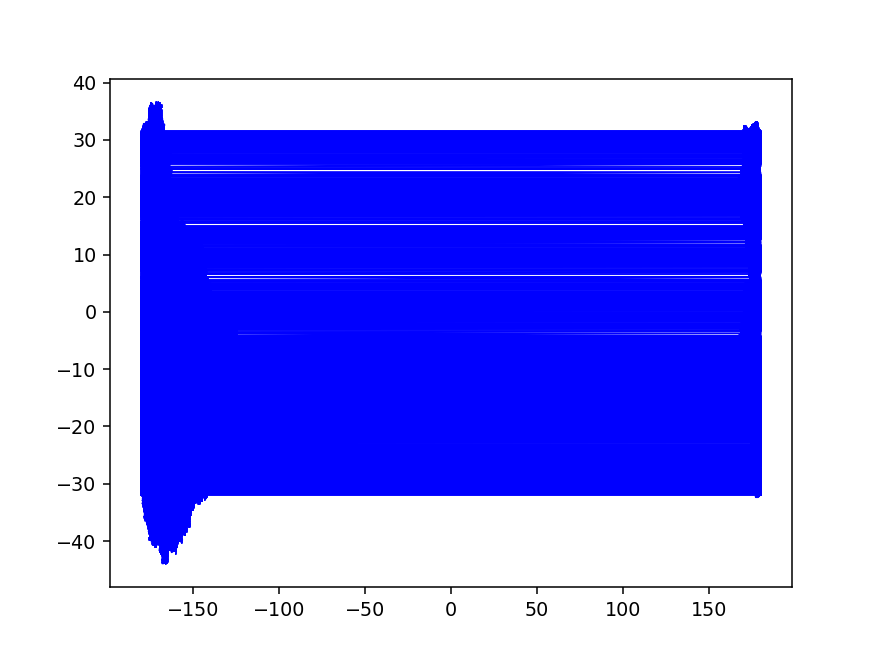

gtsm_fine_0015_map.nc
0 123561
1000 123561
2000 123561
3000 123561
4000 123561
5000 123561
6000 123561
7000 123561
8000 123561
9000 123561
10000 123561
11000 123561
12000 123561
13000 123561
14000 123561
15000 123561
16000 123561
17000 123561
18000 123561
19000 123561
20000 123561
21000 123561
22000 123561
23000 123561
24000 123561
25000 123561
26000 123561
27000 123561
28000 123561
29000 123561
30000 123561
31000 123561
32000 123561
33000 123561
34000 123561
35000 123561
36000 123561
37000 123561
38000 123561
39000 123561
40000 123561
41000 123561
42000 123561
43000 123561
44000 123561
45000 123561
46000 123561
47000 123561
48000 123561
49000 123561
50000 123561
51000 123561
52000 123561
53000 123561
54000 123561
55000 123561
56000 123561
57000 123561
58000 123561
59000 123561
60000 123561
61000 123561
62000 123561
63000 123561
64000 123561
65000 123561
66000 123561
67000 123561
68000 123561
69000 123561
70000 123561
71000 123561
72000 123561
73000 123561
74000 123561
75000 123561
760

<IPython.core.display.Javascript object>


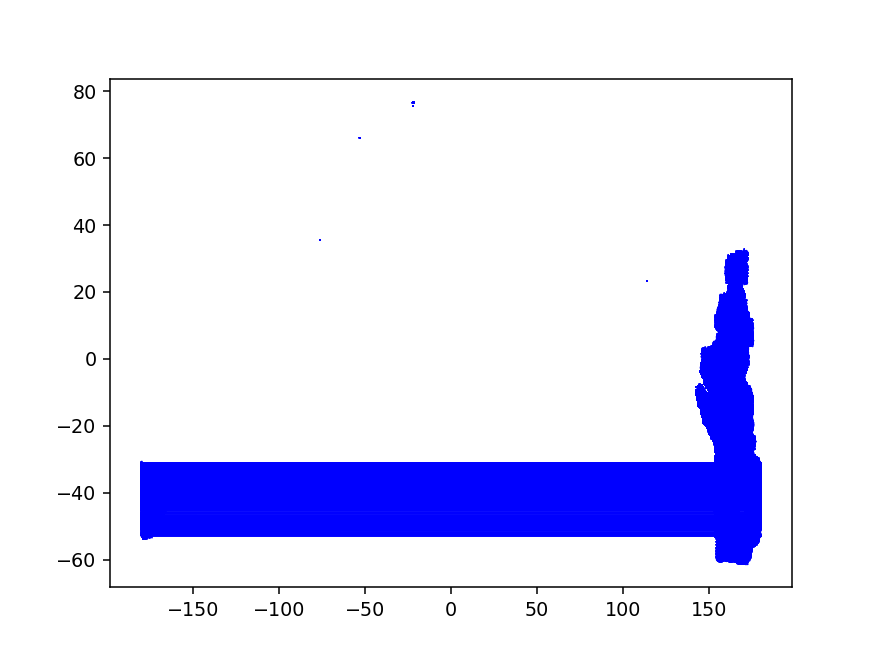

In [4]:
# create shapefile
w = shapefile.Writer()
w.autoBalance = 1
w.field('file_name')
w.field('face_id')

# put netcdf to shapefile
plt.figure()

directory = r"G:\vanCindy\GLOSSIS_fc"
alldata = {}

fileids = range(16)
for fileid in fileids:
    if fileid <= 9:
        filename = r"gtsm_fine_000" + str(fileid) + "_map.nc"
    else:
        filename = r"gtsm_fine_00" + str(fileid) + "_map.nc"
    
    print filename
    data = nc.Dataset('%s/%s' %(directory,filename))

    # Get variables from netcdf and put to single features
    lat = data.variables['mesh2d_node_x'][:]
    lon = data.variables['mesh2d_node_y'][:]
    fnodes = np.transpose(data.variables['mesh2d_face_nodes'][:, :] - 1)
    water = (data.variables['mesh2d_s1'][:, :])
    time_var = data.variables['time'] # contains 235 timesteps of data
    dtime = nc.num2date(time_var[:],time_var.units)

    fnodes = np.transpose(fnodes)
    lines = np.zeros((len(fnodes[:, 0]), len(fnodes[0, :])+ 1, 2))
    for i in range (len(fnodes[0, :])):
        lines[:, i, 1] = lon[fnodes[:, i]]
        lines[:, i, 0] = lat[fnodes[:, i]]

    lines[:, :-1, 1][numpy.ma.getmaskarray(fnodes[:, :])] = None 
    lines[:, :-1, 0][numpy.ma.getmaskarray(fnodes[:, :])] = None 
    lines[:, -1, 1] = lines[:, 0, 1]
    lines[:, -1, 0] = lines[:, 0, 0]
    
    # get to shapely polygons and filter on EUpoly
    polies = []; face_ids = []

    face_id = range(data.dimensions['nmesh2d_face'].size)
    for i in range(len(lines)):
        if i % 1000 == 0: print i, len(lines)
        number_nans = np.sum(np.isnan(lines[i])) / 2
        poly = shapely.geometry.Polygon(lines[i][~np.isnan(lines[i])].reshape((np.shape(lines[i])[0]-number_nans,2))) # remove nan values

        # define bbox of EUROPE shelf
        if poly.within(EUropepoly) or poly.intersects(EUropepoly):
            polies.append(poly)
            face_ids.append(face_id[i])
            
    # get waterlevel at face and calculate percentiles
    
    
    # write to shapefile
    for i in range(len(polies)):
        coords = polies[i].exterior.xy
        c = []
        for j in range(len(coords[0])):
            c.append([coords[0][j], coords[1][j], 0, 0]) # x, y, z, measure
        w.poly(shapeType=3, parts=[c])    
        w.record(file_name=filename, face_id=face_ids[i])
    
    # plotting
    lc = matplotlib.collections.PolyCollection(lines, facecolor='none', edgecolor='blue')
    ig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    
    # store in dict
    alldata[filename + '_polies'] = polies
    alldata[filename + '_data'] = data
    alldata[filename + '_faceids'] = face_ids

w.save('GlossisGridWorld')

## Compare tidal stations

In [5]:
dfsMeasurement = {}
dfsGLOSSIS = {}

# compare with measurements at Terschelling Noordzee
folder = r'D:\hagenaar\Documents\EMODNET\GLOSSISgrid'
stations = ['Terschelling','Delfzijl','Haringvliet']
celids = [22330,15697,45092]

for i in range(len(stations)):
    
    station = stations[i]
    celid = celids[i]
    
    dfGlossis = pd.DataFrame()
    dfGlossis['time'] = dtime
    dfGlossis['mesh2d_s1']  = alldata['gtsm_fine_0001_map.nc_data'].variables['mesh2d_s1'][:,celid]
    dfGlossis.set_index('time',inplace=True)

    dfMeasurement = pd.read_csv(os.path.join(folder,'ObservedWaterlevel' + station + 'MODIFIED.txt'), skiprows=0, delimiter=',')
    dfMeasurement['time'] = pd.to_datetime(dfMeasurement['time'])
    dfMeasurement.set_index('time', inplace=True)
    dfMeasurement[dfMeasurement['waterlevel'] > 3] = np.nan
    dfMeasurement.dropna(inplace=True)
    
    dfsMeasurement[station] = dfMeasurement
    dfsGLOSSIS[station] = dfGlossis

<IPython.core.display.Javascript object>


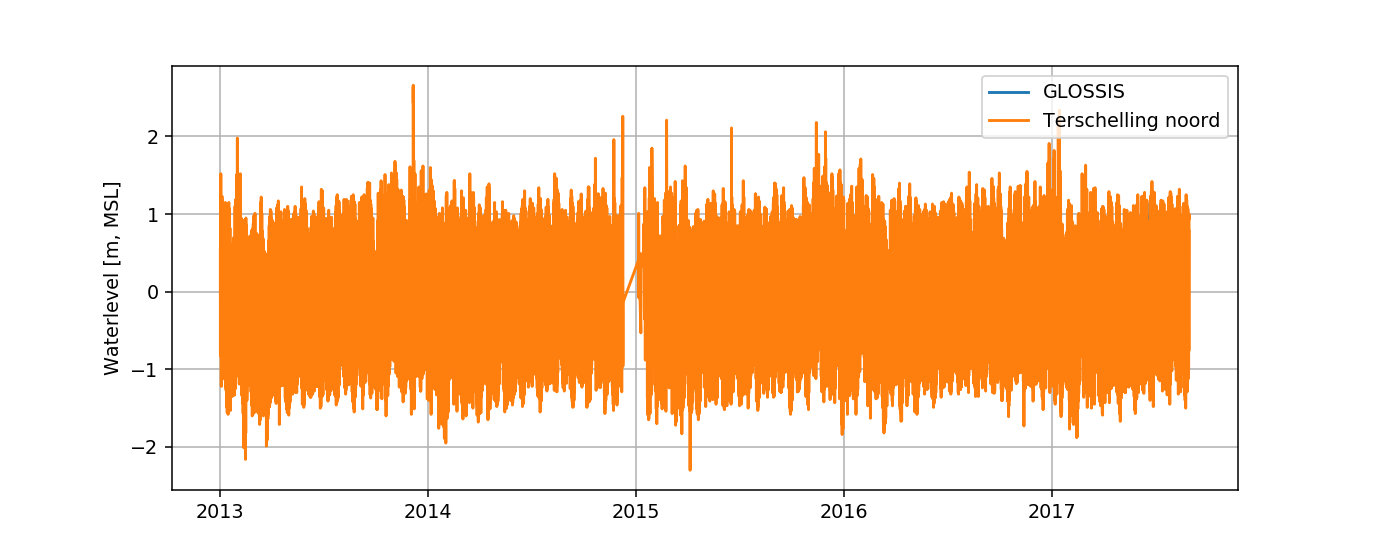

<IPython.core.display.Javascript object>


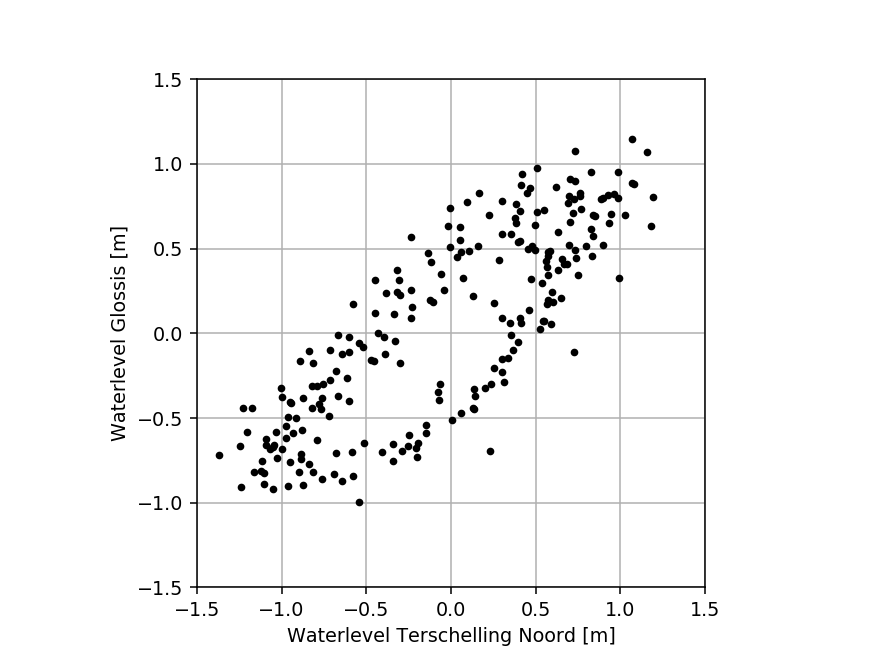

rmse 0.402996803677 m


D:\hagenaar\AppData\Local\Continuum\Anaconda\lib\site-packages\scipy\stats\stats.py:3030: RuntimeWarning: invalid value encountered in double_scalars
  t_squared = r**2 * (df / ((1.0 - r) * (1.0 + r)))
D:\hagenaar\AppData\Local\Continuum\Anaconda\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [6]:
dfTerschelling = dfsMeasurement['Terschelling']
dfGlossis = dfsGLOSSIS['Terschelling']

plt.figure(figsize=(10,4))
plt.plot(dfGlossis['mesh2d_s1'],label='GLOSSIS')
plt.plot(dfTerschelling['waterlevel'], label = 'Terschelling noord')
plt.grid()
plt.legend(loc=1)
plt.ylabel('Waterlevel [m, MSL]')

# correlation
dfTerschellingRES = dfTerschelling.resample('H').mean()
dfTerschellingRES = dfTerschellingRES[(dfTerschellingRES.index >= dfGlossis.index[0]) &(dfTerschellingRES.index <= dfGlossis.index[-1])]

plt.figure()
plt.plot(dfTerschellingRES,dfGlossis,'k.')

r = scipy.stats.pearsonr(dfTerschellingRES['waterlevel'].values,dfGlossis['mesh2d_s1'].values)
rmse = np.sqrt(np.nanmean((dfTerschellingRES['waterlevel'].values - dfGlossis['mesh2d_s1'].values) **2))
print 'rmse', rmse, 'm'

plt.axis('scaled')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.xlabel('Waterlevel Terschelling Noord [m]')
plt.ylabel('Waterlevel Glossis [m]')

plt.grid()

In [7]:
def calculateStats(wl, MSL = False, MLW = False):
    # find all high waters and calculate mean
    if MLW:
        indexes = peakutils.indexes(-wl, thres=0.4, min_dist=40)
    else:
        indexes = peakutils.indexes(wl, thres=0.4, min_dist=40)
        
    if MSL:
        mean = wl.mean()
    else:
        mean = wl[indexes].mean()
        
    freq, bins = np.histogram(wl, bins=np.arange(-3,3,0.01), normed=True)
    
    func = scipy.interpolate.interp1d(np.cumsum(freq), bins[:-1] - mean, bounds_error=False)
    
    try: 
        x0 = scipy.optimize.bisect(func,1,99)
    except RuntimeError, e:
        x0 = np.nan

    return indexes, func, x0, mean, freq, bins

Terschelling
MSL -0.0109629365831 m at percentile 47.2931769459
MHW 0.883486503856 m at percentile 90.1207346674
MLW -1.09216302953 m at percentile 8.22486063362


D:\hagenaar\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


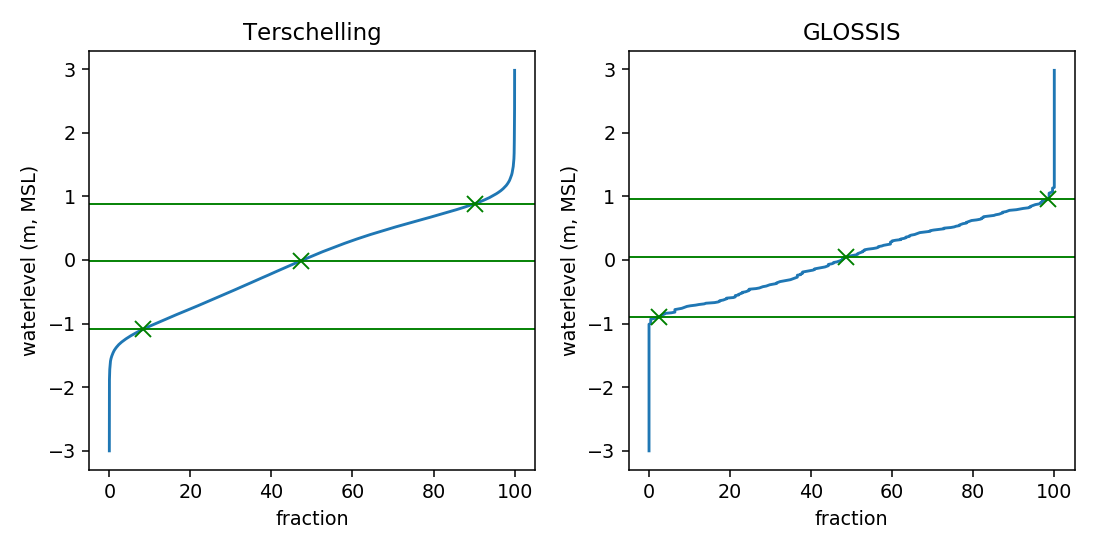

MSL 0.0456641011471 m at percentile 48.5671575444
MHW 0.957954490866 m at percentile 98.3354822263
MLW -0.893673823776 m at percentile 2.55319148936
Delfzijl
MSL 0.124800165277 m at percentile 44.6153220288
MHW 1.40686432785 m at percentile 91.2681029046
MLW -1.68029548989 m at percentile 6.51966549647


<IPython.core.display.Javascript object>


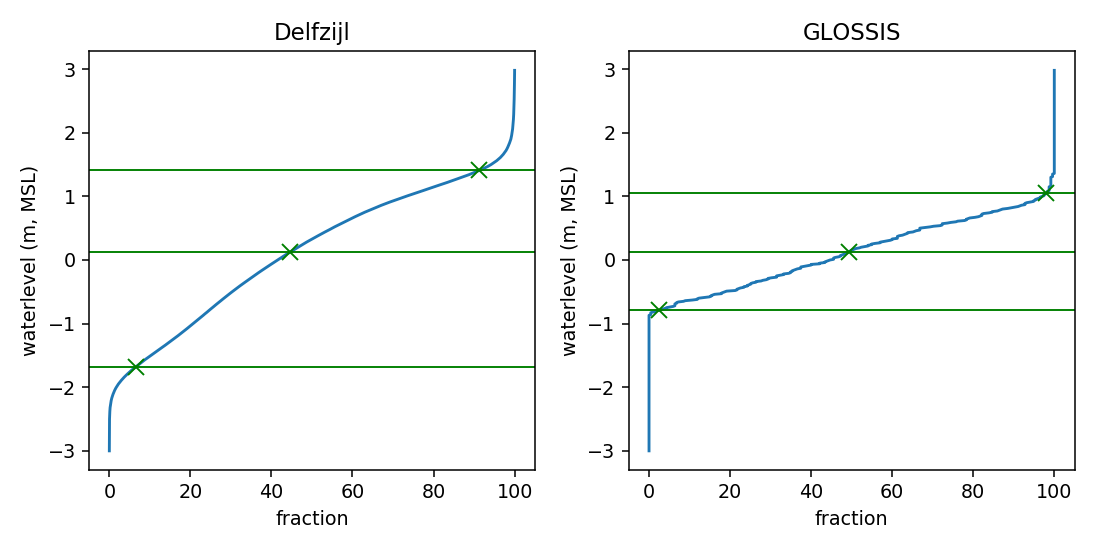

MSL 0.125562486511 m at percentile 49.267286947
MHW 1.05075249508 m at percentile 97.9867286711
MLW -0.790878578568 m at percentile 2.51580516732
Haringvliet
MSL -0.00437521890688 m at percentile 55.79172336
MHW 1.24065818069 m at percentile 93.9822736306
MLW -0.860807202732 m at percentile 11.9643781811


<IPython.core.display.Javascript object>


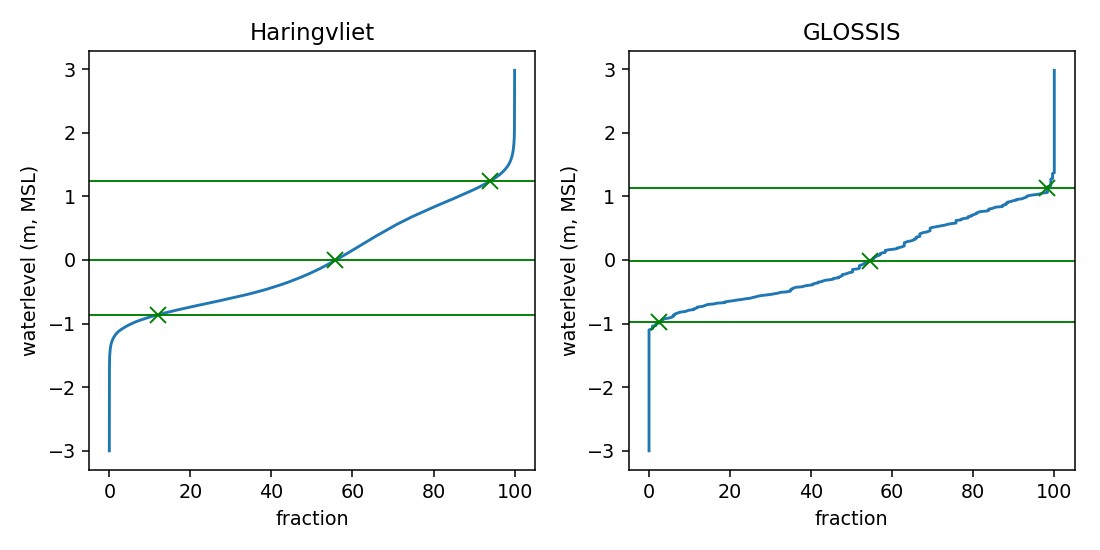

MSL -0.00901327303285 m at percentile 54.510073488
MHW 1.13750599912 m at percentile 98.1383744569
MLW -0.982065049531 m at percentile 2.55319148936


In [8]:
percentilesMeasurements = {}
percentilesGlossis = {}

for i in range(len(stations)):
    
    station = stations[i]
    print station
    
    dfMeasurement = dfsMeasurement[station]
    dfGlossis = dfsGLOSSIS[station]

    # find distribution of high and low waters
#     plt.figure(figsize=(14,4))

    # MSL
    indexes, fMSL, x0MSL, MSL, freq, bins = calculateStats(dfMeasurement['waterlevel'].values, MSL=True)
    print 'MSL', MSL, 'm','at percentile', x0MSL
#     plt.plot(dfMeasurement['waterlevel'])

    # MHW
    indexes, fMHW, x0MHW, MHW, _ , _= calculateStats(dfMeasurement['waterlevel'].values)
    print 'MHW', MHW, 'm','at percentile', x0MHW 
#     plt.plot(dfMeasurement['waterlevel'][indexes],'ro')

    # MLW
    indexes, fMLW, x0MLW, MLW, _, _ = calculateStats(dfMeasurement['waterlevel'].values, MLW=True)
    print 'MLW', MLW, 'm','at percentile', x0MLW
#     plt.plot(dfMeasurement['waterlevel'][indexes],'bo')
    
    # Storage
    percentilesMeasurements[station] = [x0MSL, x0MHW, x0MLW]

    # Cumullative distribution
    plt.figure(figsize =(8,4))

    # Measurement
    plt.subplot(121)
    plt.plot(np.cumsum(freq), bins[:-1])

    plt.axhline(MSL,color='green',lw=1)
    plt.plot(x0MSL,MSL,'gx',ms=8) 

    plt.axhline(MHW,color='green',lw=1)
    plt.plot(x0MHW, MHW,'gx',ms=8)

    plt.axhline(MLW,color='green',lw=1)
    plt.plot(x0MLW, MLW,'gx',ms=8)

    plt.title(station)
    plt.xlabel('fraction')
    plt.ylabel('waterlevel (m, MSL)')

    # GLOSSIS
    plt.subplot(122)

    # MSL
    indexes, fMSL, x0MSL, MSL, freq, bins = calculateStats(dfGlossis['mesh2d_s1'].dropna().values, True)
    print 'MSL', MSL, 'm','at percentile', x0MSL

    # MHW
    indexes, fMHW, x0MHW, MHW, _ , _= calculateStats(dfGlossis['mesh2d_s1'].dropna().values)
    print 'MHW', MHW, 'm','at percentile', x0MHW 

    # MLW
    indexes, fMLW, x0MLW, MLW, _, _ = calculateStats(dfGlossis['mesh2d_s1'].dropna().values, MLW=True)
    print 'MLW', MLW, 'm','at percentile', x0MLW
    
    # Storage
    percentilesGlossis[station] = [x0MSL, x0MHW, x0MLW]

    plt.plot(np.cumsum(freq), bins[:-1])

    plt.axhline(MSL,color='green',lw=1)
    plt.plot(x0MSL,MSL,'gx',ms=8) 

    plt.axhline(MHW,color='green',lw=1)
    plt.plot(x0MHW, MHW,'gx',ms=8)

    plt.axhline(MLW,color='green',lw=1)
    plt.plot(x0MLW, MLW,'gx',ms=8)

    plt.title('GLOSSIS')
    plt.xlabel('fraction')
    plt.ylabel('waterlevel (m, MSL)')
    plt.tight_layout()

In [9]:
# compare percentiles
pMeasurements = np.ravel(percentilesMeasurements.values())
pGlossis = np.ravel(percentilesGlossis.values())

print 'average difference percentiles', np.mean(pMeasurements - pGlossis), '%'
print 'std difference percentiles', np.std(pMeasurements - pGlossis), '%'

average difference percentiles -0.516339292363 %
std difference percentiles 5.66834603806 %
